In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
plt.style.use('seaborn-talk')

# Using Covariants

In [91]:
alpha = pd.read_json("20I.Alpha.V1_data.json")
beta = pd.read_json("20H.Beta.V2_data.json")
gamma = pd.read_json("20J.Gamma.V3_data.json")

In [92]:
alpha_uk = pd.DataFrame.from_dict(dict(alpha['United Kingdom']))
beta_sa = pd.DataFrame.from_dict(dict(beta["South Africa"]))
gamma_br = pd.DataFrame.from_dict(dict(gamma['Brazil']))

In [96]:
cvdata = [alpha_uk, beta_sa, gamma_br]
for frame in cvdata:
    frame.week = pd.to_datetime(frame['week'])
    frame['freq'] = frame.cluster_sequences / frame.total_sequences

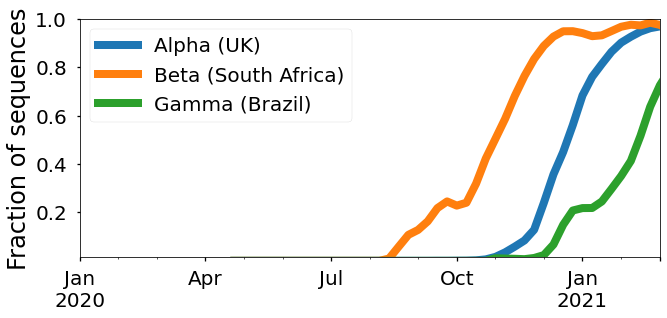

In [150]:
fig, ax = plt.subplots()

labels = ["Alpha (UK)", "Beta (South Africa)", "Gamma (Brazil)"]
for i, var in enumerate(cvdata):
    var.plot('week', 'freq', ax=ax, label=labels[i], lw=8)
    
ax.set_xlim(pd.Timestamp('2020-01-1'), pd.Timestamp('2021-3-1'))
ax.set_ylim(0.015, 1)

#ax.set_yscale('log')

ax.set_aspect(25)

ax.set_xlabel(None)
ax.set_ylabel('Fraction of sequences', size=24)
ax.tick_params(labelsize=20)
ax.legend(fontsize=20)

fig.savefig('voc_trajectories.pdf', bbox_inches='tight')

# Using outbreak.info data

In [56]:
names = ['alpha', 'beta', 'gamma']

In [57]:
data = {name: pd.read_csv(name + "_2021-07-15.tsv", sep='\t') for name in names}

In [58]:
for name in names:
    data[name].date = pd.to_datetime(data[name]['date'])
    #data[name].set_index(['date'], inplace=True)

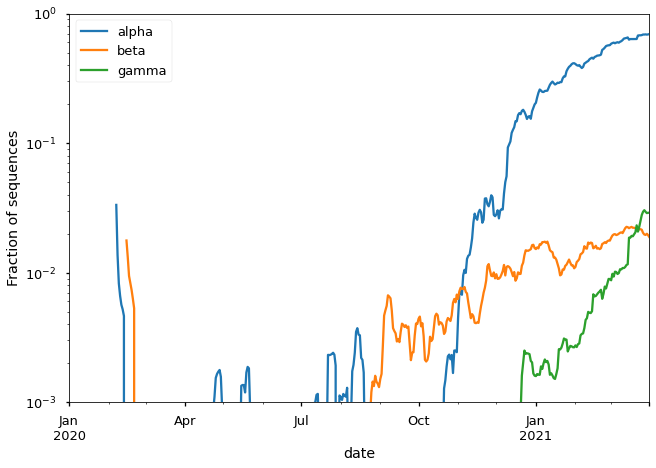

In [67]:
fig, ax = plt.subplots()
for name in names:
    data[name].plot('date', 'proportion', ax=ax, label=name)
    
ax.set_xlim(pd.Timestamp('2020-01-1'), pd.Timestamp('2021-3-31'))
ax.set_ylim(0.001, 1)

ax.set_ylabel('Fraction of sequences')
ax.set_yscale('log')

In [50]:
data['alpha']

,date,total_count,lineage_count,total_count_rolling,lineage_count_rolling,proportion,proportion_ci_lower,proportion_ci_upper,dateTime,source
0,2020-02-07,30,1,30.000000,1.000000,0.033333,0.003620,0.145418,2020-02-07T05:00:00.000Z,NaN
1,2020-02-08,43,0,36.500000,0.500000,0.013699,0.000014,0.066944,2020-02-08T05:00:00.000Z,NaN
2,2020-02-09,48,0,40.333333,0.333333,0.008264,0.000012,0.060498,2020-02-09T05:00:00.000Z,NaN
3,2020-02-10,30,0,37.750000,0.250000,0.006623,0.000013,0.063558,2020-02-10T05:00:00.000Z,NaN
4,2020-02-11,26,0,35.400000,0.200000,0.005650,0.000014,0.068777,2020-02-11T05:00:00.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...
515,2021-07-06,587,64,3284.857143,152.428571,0.046403,0.039483,0.053858,2021-07-06T04:00:00.000Z,NaN
516,2021-07-07,279,20,2606.857143,121.714286,0.046690,0.039187,0.055413,2021-07-07T04:00:00.000Z,NaN
517,2021-07-08,80,16,1857.857143,48.000000,0.025836,0.019340,0.033803,2021-07-08T04:00:00.000Z,NaN
518,2021-07-09,18,5,1375.142857,36.285714,0.026387,0.018709,0.035644,2021-07-09T04:00:00.000Z,NaN
